# labelled Env Testing

In [ ]:
import gymnasium as gym
from logic_guided_rl.logic_guidance.ltlf_to_dfa import ltlf_to_dfa

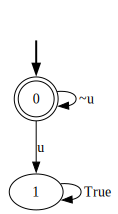

In [34]:
# Create automaton
ltlf_formula = "G ~u"
dfa = ltlf_to_dfa(ltlf_formula)
automaton_graph = dfa.automaton.to_graphviz()
automaton_graph

In [ ]:
# Define labelling function
def cartpole_labelling_function(obs):
    x, x_dot, theta, theta_dot = obs
    labels = {}
    if abs(theta) > 0.5:
        labels["u"] = True  # unsafe
    else:
        labels["u"] = False  # safe
    return labels


labelling_function = cartpole_labelling_function

In [75]:
# Create labelled environment
env = gym.make("CartPole-v1")

In [111]:
env.reset()
dfa.reset()

dfa_state = next(iter(dfa.cur_state))

for _ in range(20):
    action = (
        env.action_space.sample()
    )  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    next_dfa_state = next(iter(dfa.step(labelling_function(observation))))
    if next_dfa_state != dfa_state:
        transition = True
    else:
        transition = False
    print(observation[2], next_dfa_state, transition)
    dfa_state = next_dfa_state

-0.020594472 0 False
-0.027406856 0 False
-0.040201347 0 False
-0.059019566 0 False
-0.08393856 0 False
-0.11506897 0 False
-0.1408922 0 False
-0.17324302 0 False
-0.20068076 0 False
-0.22344102 0 False
-0.24172856 0 False
-0.2670918 0 False
-0.28828865 0 False
-0.31675166 0 False
-0.3525612 0 False
-0.38477162 0 False
-0.42456383 0 False
-0.47203082 0 False
-0.51673555 1 True
-0.56934434 1 False


/home/jacques/miniconda3/envs/logic_guided_rl/lib/python3.10/site-packages/gymnasium/envs/classic_control/cartpole.py:214: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(
